In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import seaborn as sns

In [2]:
#Getting data
features=pd.read_csv("features.csv")
store=pd.read_csv("stores.csv")
train=pd.read_csv("train.csv")

In [3]:
print(store.shape)
store.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
print(train.shape)
#train.loc[(train['Store']==1) & (train['Date']=='2010-02-05')].count()
train.head(5)

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


merge the datasets

In [6]:
#reseting train
train=train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
train.head(10)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
5,1,2010-03-12,1439541.59
6,1,2010-03-19,1472515.79
7,1,2010-03-26,1404429.92
8,1,2010-04-02,1594968.28
9,1,2010-04-09,1545418.53


In [7]:
#merging train and feature
data=pd.merge(train,features,on=['Store','Date'],how='inner')
data=pd.merge(data,store,on=['Store'],how='inner')
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,1439541.59,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,1472515.79,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,1404429.92,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,2010-04-02,1594968.28,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,2010-04-09,1545418.53,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


In [8]:
#sorting values of Data
data=data.sort_values(by='Date')
data.head(5)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,NaN,NaN,NaN,NaN,NaN,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,C,42988


## Data Exploration and Preprocessing

In [9]:
store.describe()  #statistical info

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


Average store size is 130,287 SQFT
Most stores are around 202,307 SQFT

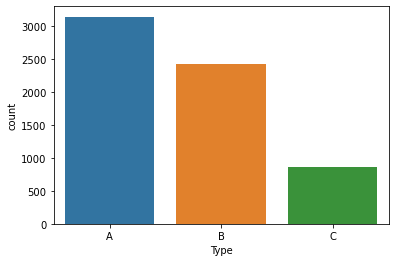

In [10]:
fig=sns.countplot(x="Type", data=data)

There are three types of stores A,B and C .Nearly, half of the stores are belongs to Type A.

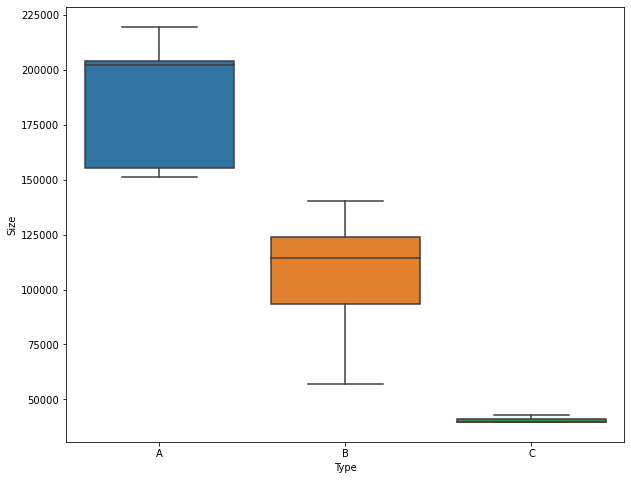

In [11]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=data, showfliers=False)

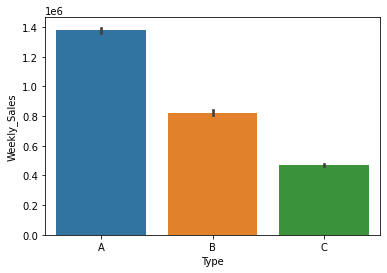

In [12]:
sns.barplot(x='Type',y='Weekly_Sales',data=data)
plt.show()

Size of the type of stores are consistent with sales, as expected. Higher size stores has higher sales.

<AxesSubplot:ylabel='Frequency'>

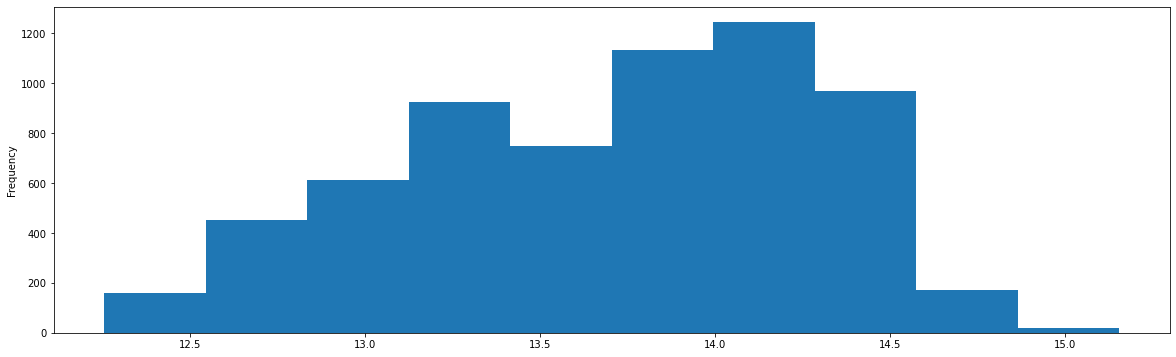

In [13]:
plt.figure(figsize=(20,6))
np.log(data["Weekly_Sales"]).plot.hist()

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

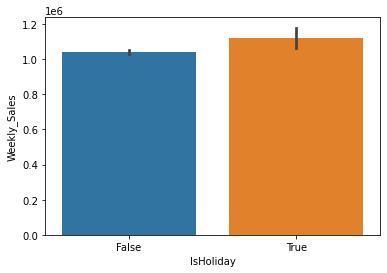

In [14]:
sns.barplot(x="IsHoliday",y='Weekly_Sales',data=data)

clearly sales are higher on holidays compared to other days

In [15]:
df=data.copy()

In [16]:
df_holiday = df.loc[data['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [17]:
df_not_holiday = df.loc[data['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

All holidays are not in the data. There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

In [18]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

#df.loc[(np.isnan(df['MarkDown1'])!=True)].head()

<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

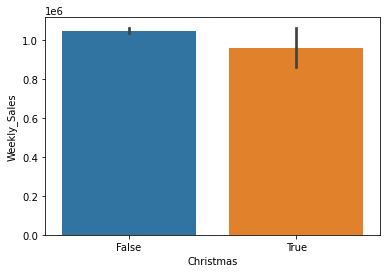

In [19]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

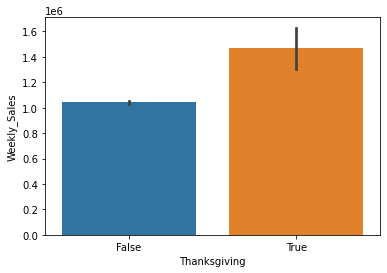

In [20]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving

<AxesSubplot:xlabel='Super_Bowl', ylabel='Weekly_Sales'>

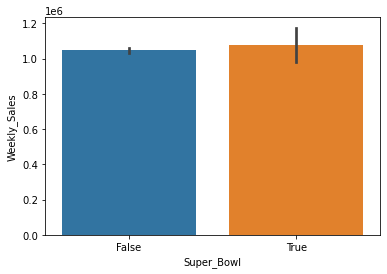

In [21]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

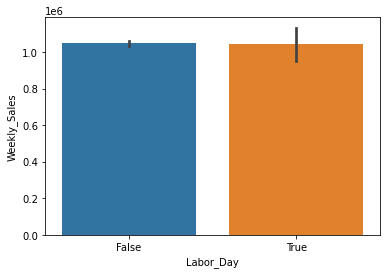

In [22]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day

It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving.Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week.

In [23]:
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Type               0
Size               0
dtype: int64

**Using Heatmap to represent the null values**

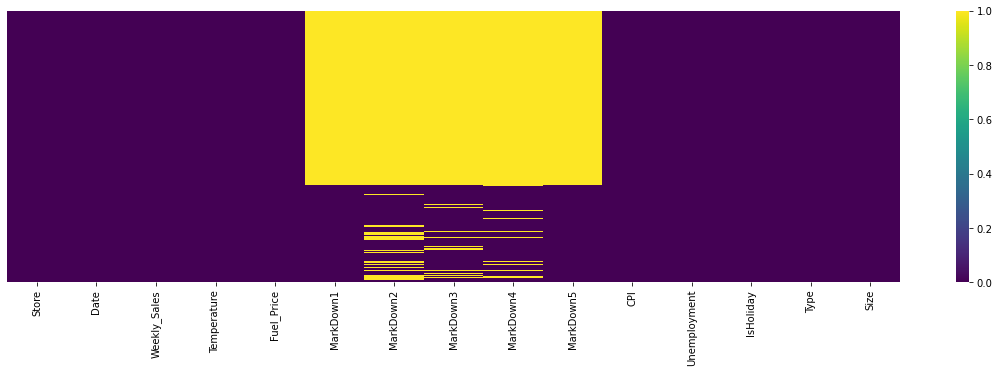

In [24]:
fig,ax=plt.subplots(figsize=(20,5))
ax=sns.heatmap(data.isnull(),yticklabels=False, cmap="viridis")

We can see only markdowns have null values

In [25]:
data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819


In [26]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

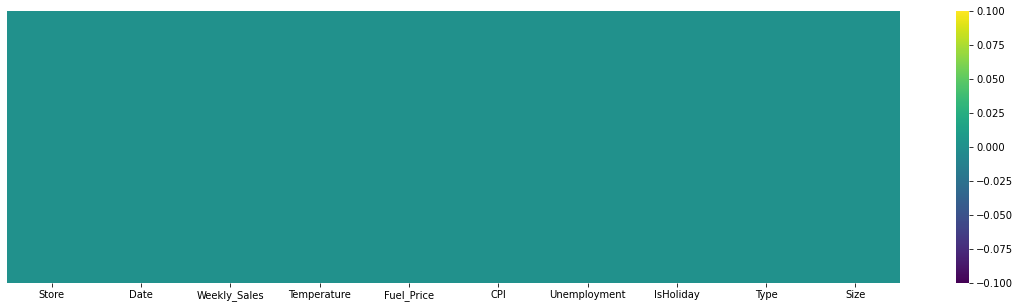

In [27]:
fig,ax=plt.subplots(figsize=(20,5))
ax=sns.heatmap(data.isnull(),yticklabels=False, cmap="viridis")

In [28]:
train.describe()
data=data[data['Weekly_Sales']>0]
data.describe()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,60.663782,3.358607,171.578394,7.999151,130287.600000
std,12.988182,5.643666e+05,18.444933,0.459020,39.356712,1.875885,63117.022465
min,1.000000,2.099862e+05,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,12.000000,5.533501e+05,47.460000,2.933000,131.735000,6.891000,70713.000000
50%,23.000000,9.607460e+05,62.670000,3.445000,182.616521,7.874000,126512.000000
75%,34.000000,1.420159e+06,74.940000,3.735000,212.743293,8.622000,202307.000000
max,45.000000,3.818686e+06,100.140000,4.468000,227.232807,14.313000,219622.000000


In [29]:
data['Holiday']=[int(i) for i in list(data.IsHoliday)]
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107,0
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557,0
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533,0
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819,0
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819,0


In [30]:
Type_dummy=pd.get_dummies(data['Type'],drop_first=True)
Type_dummy.head(10)

,B,C
0,0,0
1287,1,0
5148,0,1
2288,1,0
4147,0,1
3432,1,0
3003,1,0
3146,1,0
3289,0,0
2574,0,0


In [31]:
data=pd.concat([data,Type_dummy],axis=1)
data.head(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0,0,1
3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107,0,1,0
3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557,0,1,0
3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533,0,1,0
3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819,0,0,0
2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819,0,0,0


In [32]:
data=data.drop(['Type','IsHoliday'],axis=1)
data.drop(10)

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0
1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0
5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1
2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0
4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,56.69,3.882,216.151590,7.293,128107,0,1,0
714,5,2012-10-26,319550.77,71.70,3.506,224.037814,5.422,34875,0,1,0
5719,40,2012-10-26,921264.52,49.65,3.917,138.728161,4.145,155083,0,0,0
2573,18,2012-10-26,1127516.25,56.09,3.917,138.728161,8.243,120653,0,1,0


In [33]:
data=data.drop(['Date'],axis=1)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

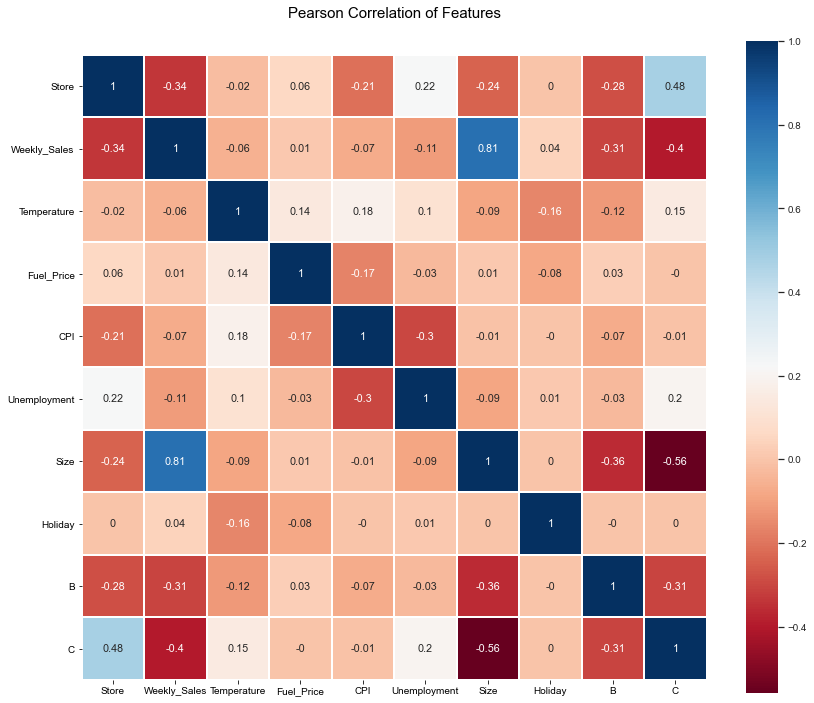

In [34]:
colormap = plt.cm.RdBu
corr = data.astype(float).corr()

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=0.9)
sns.heatmap(round(corr,2),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [35]:
corr

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
Store,1.000000e+00,-0.335332,-0.022659,0.060023,-0.209492,0.223531,-2.442698e-01,1.637929e-16,-2.788104e-01,4.832242e-01
Weekly_Sales,-3.353320e-01,1.000000,-0.063810,0.009464,-0.072634,-0.106176,8.104685e-01,3.689097e-02,-3.092485e-01,-3.992017e-01
Temperature,-2.265908e-02,-0.063810,1.000000,0.144982,0.176888,0.101158,-9.248017e-02,-1.550913e-01,-1.220972e-01,1.456913e-01
Fuel_Price,6.002295e-02,0.009464,0.144982,1.000000,-0.170642,-0.034684,9.053225e-03,-7.834652e-02,3.317139e-02,-3.425901e-03
CPI,-2.094919e-01,-0.072634,0.176888,-0.170642,1.000000,-0.302020,-9.737309e-03,-2.162091e-03,-6.815583e-02,-8.838630e-03
Unemployment,2.235313e-01,-0.106176,0.101158,-0.034684,-0.302020,1.000000,-8.917014e-02,1.096028e-02,-3.376551e-02,1.968357e-01
Size,-2.442698e-01,0.810468,-0.092480,0.009053,-0.009737,-0.089170,1.000000e+00,2.397461e-17,-3.592356e-01,-5.577574e-01
Holiday,1.637929e-16,0.036891,-0.155091,-0.078347,-0.002162,0.010960,2.397461e-17,1.000000e+00,-5.563930e-17,4.869544e-18
B,-2.788104e-01,-0.309248,-0.122097,0.033171,-0.068156,-0.033766,-3.592356e-01,-5.563930e-17,1.000000e+00,-3.056249e-01
C,4.832242e-01,-0.399202,0.145691,-0.003426,-0.008839,0.196836,-5.577574e-01,4.869544e-18,-3.056249e-01,1.000000e+00


In [36]:
corr_cutoff = 0.82
columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= corr_cutoff:
            if columns[j]:
                columns[j] = False
                
selected_columns = data.columns[columns]
highcorr_columns = data.columns.difference(selected_columns)

Our criteria for elimination was any variable above 0.8. This was based on the correlation heatmap that we created

In [37]:
highcorr_columns

Index([], dtype='object')

In [38]:
data.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,1,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0
1287,10,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0
5148,37,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1
2288,17,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0
4147,30,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1


## Training the model

In [39]:
#splitting data in input and output
X=data.drop(['Weekly_Sales','Store'],axis=1)
y=data['Weekly_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [40]:
X

,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,42.31,2.572,211.096358,8.106,151315,0,0,0
1287,54.34,2.962,126.442065,9.765,126512,0,1,0
5148,45.97,2.572,209.852966,8.554,39910,0,0,1
2288,23.11,2.666,126.442065,6.548,93188,0,1,0
4147,39.05,2.572,210.752605,8.324,42988,0,0,1
...,...,...,...,...,...,...,...,...
3574,56.69,3.882,216.151590,7.293,128107,0,1,0
714,71.70,3.506,224.037814,5.422,34875,0,1,0
5719,49.65,3.917,138.728161,4.145,155083,0,0,0
2573,56.09,3.917,138.728161,8.243,120653,0,1,0


In [41]:
LR=LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(normalize=True)

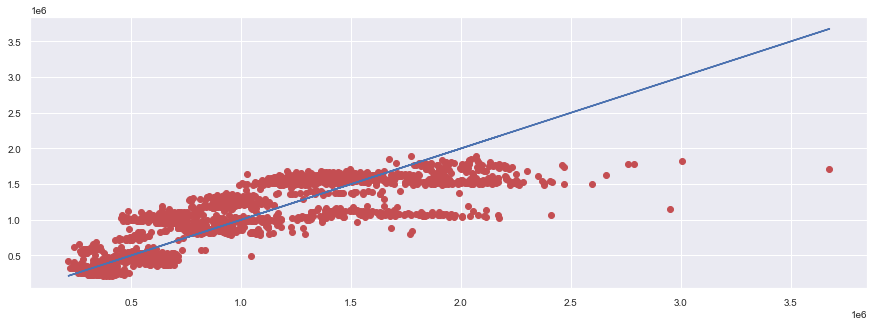

In [42]:
y_pred=LR.predict(X_test)
fig,ax=plt.subplots(figsize=(15,5))
ax=plt.plot(y_test,y_pred,'ro')
ax=plt.plot(y_test,y_test,'b-')
plt.show()

In [43]:
Root_mean_square_error=np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

314762.44360849715


In [44]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2*100,'%')

67.6888810696127 %


In [45]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [46]:
y_pred=regressor.predict(X_test)

In [47]:
Root_mean_square_error=np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

141851.32421330086


In [48]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2*100,'%')

92.17199267832504 %


In [49]:
prediction=LR.predict(pd.DataFrame([(40.37,2.876,173.325456,7.934,93188,0,0,0)]))
print(prediction)

[685392.19731954]


In [ ]:
import joblib
filename='walmart.sav'
joblib.dump(regressor,filename)

In [ ]:
import pickle
pickle.dump(regressor, open('model.pkl','wb'),protocol=2)